In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
movies = pd.read_csv('/Users/davidbroxmeyer/dat-07-26/Homework/Unit2/data/imdb_1000.csv')

In [4]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [5]:
import matplotlib.pyplot as plt

In [6]:
#Check the number of rows
len(movies)


979

In [7]:
#Check the number of columns
len(movies.columns)

6

In [9]:
#Check the data type of each column
type(movies.columns)

pandas.core.indexes.base.Index

In [10]:
#Check the data type of each column.
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [11]:
#Calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [12]:
#Sort the DataFrame by duration to find the shortest and longest movies.
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

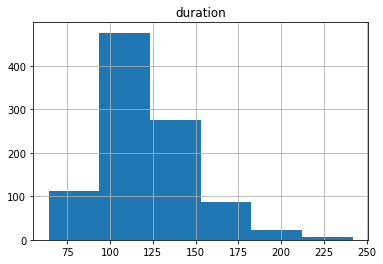

In [13]:
#Create a histogram of duration, choosing an "appropriate" number of bins
movies.hist('duration',bins=6)

<AxesSubplot:>

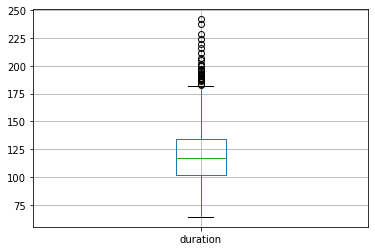

In [14]:
#Use a box plot to display that same data.
movies.boxplot('duration')

In [15]:
#Count how many movies have each of the content ratings
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Text(0, 0.5, 'number')

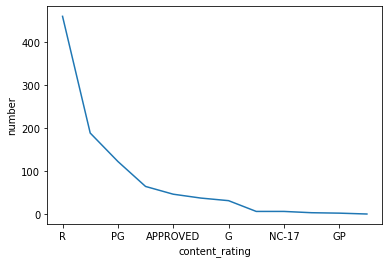

In [17]:
#Use a visualization to display that same data, including a title and x and y labels
ax = movies['content_rating'].value_counts().plot(x='content_rating', y='number')
ax.set_xlabel('content_rating')
ax.set_ylabel('number')

In [18]:
?movies.plot

In [19]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

In [20]:
#Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
conditions = [
    movies['content_rating'] == 'NOT RATED',
    movies['content_rating'] == 'APPROVED',
    movies['content_rating'] == 'PASSED', 
    movies['content_rating'] == 'GP' 
]
results = [
    'UNRATED',
    'UNRATED',
    'UNRATED',
    'UNRATED'
]


movies['RATED/UNRATED'] = np.select(conditions, results, movies['content_rating'])

movies[movies['content_rating'] == 'PASSED']

,star_rating,title,content_rating,genre,duration,actors_list,RATED/UNRATED
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F...",UNRATED
79,8.4,Double Indemnity,PASSED,Crime,107,"[u'Fred MacMurray', u'Barbara Stanwyck', u'Edw...",UNRATED
159,8.2,The Best Years of Our Lives,PASSED,Drama,172,"[u'Fredric March', u'Dana Andrews', u'Myrna Loy']",UNRATED
224,8.1,The Wizard of Oz,PASSED,Adventure,102,"[u'Judy Garland', u'Frank Morgan', u'Ray Bolger']",UNRATED
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']",UNRATED
358,8.0,The Lady Vanishes,PASSED,Comedy,96,"[u'Margaret Lockwood', u'Michael Redgrave', u'...",UNRATED
619,7.7,Forbidden Planet,PASSED,Action,98,"[u'Walter Pidgeon', u'Anne Francis', u'Leslie ...",UNRATED


In [21]:
#Convert the following content ratings to "NC-17": X, TV-MA.

conditions = [
    movies['content_rating'] == 'X',
    movies['content_rating'] == 'TV-MA'
]
results = [
    'NC-17',
    'NC-17'
]


movies['Non-NC-17','NC-17'] = np.select(conditions, results, movies['content_rating'])

movies[movies['content_rating'] == 'X']

,star_rating,title,content_rating,genre,duration,actors_list,RATED/UNRATED,"(Non-NC-17, NC-17)"
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich...",X,NC-17
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi...",X,NC-17
486,7.8,Evil Dead II,X,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']",X,NC-17
913,7.5,Suspiria,X,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav...",X,NC-17


In [22]:
#Count the number of missing values in each column
movies.isnull().sum()

star_rating           0
title                 0
content_rating        3
genre                 0
duration              0
actors_list           0
RATED/UNRATED         3
(Non-NC-17, NC-17)    3
dtype: int64

In [12]:
movies[(movies['genre'] == 'Biography') | (movies['genre'] == 'Biography') | (movies['genre'] == 'Adventure')]


,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
...,...,...,...,...,...,...
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."
961,7.4,Capote,R,Biography,114,"[u'Philip Seymour Hoffman', u'Clifton Collins ..."
964,7.4,Lincoln,PG-13,Biography,150,"[u'Daniel Day-Lewis', u'Sally Field', u'David ..."


In [23]:
#If there are missing values: examine them, then fill them in with "reasonable" values.
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list,RATED/UNRATED,"(Non-NC-17, NC-17)"
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin...",NaN,NaN
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ...",NaN,NaN
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",NaN,NaN


In [25]:
#If there are missing values: examine them, then fill them in with "reasonable" values.
movies['content_rating'].fillna('R', inplace = True)

In [27]:
movies[(movies['title'] == 'Butch Cassidy and the Sundance Kid') | (movies['title'] == 'Where Eagles Dare') | (movies['title'] == 'True Grit') ]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,R,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,R,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [28]:
#Calculate the average star rating for movies 2 hours or longer, 

movies[movies['duration'] > 120]['star_rating'].mean()

7.953669724770622

In [30]:
#and compare that with the average star rating for movies shorter than 2 hours
movies[movies['duration'] < 120]['star_rating'].mean()

7.838666666666657

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

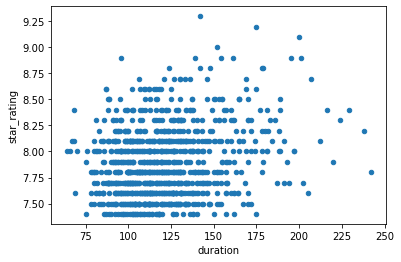

In [31]:
#Use a visualization to detect whether there is a relationship between duration and star rating.
movies.plot.scatter('duration', 'star_rating')

In [32]:
#Calculate the average duration for each genre
movies.groupby(['genre'])['duration'].agg(np.mean)

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

<AxesSubplot:xlabel='content_rating'>

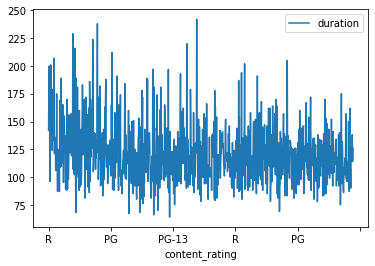

In [33]:
#Visualize the relationship between content rating and duration.
movies.plot(x = 'content_rating', y = 'duration')

In [66]:
#Determine the top rated movie (by star rating) for each genre.
movies.groupby(['genre'])['title'].agg(np.max)

genre
Action                                   Yojimbo
Adventure                              True Grit
Animation                         Wreck-It Ralph
Biography                          Walk the Line
Comedy                                Zombieland
Crime                                     Zodiac
Drama                                       Zulu
Family       Willy Wonka & the Chocolate Factory
Fantasy                The City of Lost Children
Film-Noir                          The Third Man
History                      Battleship Potemkin
Horror                                     [Rec]
Mystery                                  Vertigo
Sci-Fi             The Day the Earth Stood Still
Thriller               The Man Who Knew Too Much
Western                               Unforgiven
Name: title, dtype: object

In [34]:
#Visualize the relationship between content rating and duration.
movies.groupby(['genre'])['star_rating'].agg(np.mean)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [35]:
#Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.
movies[movies.duplicated(subset=['title'])]

,star_rating,title,content_rating,genre,duration,actors_list,RATED/UNRATED,"(Non-NC-17, NC-17)"
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",R,R
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",R,R
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",PG-13,PG-13
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",NaN,NaN


In [36]:
#Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.
movies[movies.duplicated(subset=['star_rating', 'title', 'content_rating', 'genre', 'duration', 'actors_list' ])]
#They are not actually duplicates, since the data was nothing

,star_rating,title,content_rating,genre,duration,actors_list,RATED/UNRATED,"(Non-NC-17, NC-17)"


In [37]:
#Calculate the average star rating for each genre, but only include genres with at least 10 movies
#Option 1: manually create a list of relevant genres, then filter using that list
#Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
#Option 3: calculate the average star rating for all genres, then filter using a boolean Series
#Option 4: aggregate by count and mean, then filter using the count
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [78]:
#Option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [83]:
#Option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre')['star_rating'].agg([np.mean])[movies['genre'].value_counts() >= 10]

<ipython-input-83-bd47668095e9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies.groupby('genre')['star_rating'].agg([np.mean])[movies['genre'].value_counts() >= 10]


,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


In [57]:
#Figure out something "interesting" using the actors data!
movies['actors_list'].value_counts()
#'Daniel Radcliffe', Emma Watson', Rupert Grint are the most common actors together - Harry Potter

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']             6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']               3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']          2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                       2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']         2
                                                                  ..
[u'Takeshi Kitano', u'Tadanobu Asano', u'Yui Natsukawa']           1
[u'Bruce Campbell', u'Embeth Davidtz', u'Marcus Gilbert']          1
[u'Colin Firth', u'Taron Egerton', u'Samuel L. Jackson']           1
[u'Leonardo DiCaprio', u'Emily Mortimer', u'Mark Ruffalo']         1
[u'Harry Dean Stanton', u'Nastassja Kinski', u'Dean Stockwell']    1
Name: actors_list, Length: 969, dtype: int64

In [42]:
#Figure out something "interesting" using the actors data!
movies[movies['title'].str.lower().str.contains('harry potter')]

,star_rating,title,content_rating,genre,duration,actors_list,RATED/UNRATED,"(Non-NC-17, NC-17)"
222,8.1,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,130,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13,PG-13
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG,PG
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13,PG-13
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13,PG-13
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG,PG
909,7.5,Harry Potter and the Sorcerer's Stone,PG,Adventure,152,"[u'Daniel Radcliffe', u'Rupert Grint', u'Richa...",PG,PG
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13,PG-13


In [43]:
#Figure out something "interesting" using the actors data!
movies['actors_list']

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

In [7]:
actors_total = zip(actors)

In [8]:
actors_total

In [44]:
#Figure out something "interesting" using the actors data!
name_vals = [val.strip('[]').replace("u'", "").replace("'", "").split(',') for val in movies['actors_list'].values]

In [46]:
#Figure out something "interesting" using the actors data!
name_vals[0]

['Tim Robbins', ' Morgan Freeman', ' Bob Gunton']

In [47]:
#Figure out something "interesting" using the actors data!
name_vals = [name.strip().lower() for names in name_vals for name in names]

In [48]:
name_vals

['tim robbins',
 'morgan freeman',
 'bob gunton',
 'marlon brando',
 'al pacino',
 'james caan',
 'al pacino',
 'robert de niro',
 'robert duvall',
 'christian bale',
 'heath ledger',
 'aaron eckhart',
 'john travolta',
 'uma thurman',
 'samuel l. jackson',
 'henry fonda',
 'lee j. cobb',
 'martin balsam',
 'clint eastwood',
 'eli wallach',
 'lee van cleef',
 'elijah wood',
 'viggo mortensen',
 'ian mckellen',
 'liam neeson',
 'ralph fiennes',
 'ben kingsley',
 'brad pitt',
 'edward norton',
 'helena bonham carter',
 'elijah wood',
 'ian mckellen',
 'orlando bloom',
 'leonardo dicaprio',
 'joseph gordon-levitt',
 'ellen page',
 'mark hamill',
 'harrison ford',
 'carrie fisher',
 'tom hanks',
 'robin wright',
 'gary sinise',
 'elijah wood',
 'ian mckellen',
 'viggo mortensen',
 'matthew mcconaughey',
 'anne hathaway',
 'jessica chastain',
 'jack nicholson',
 'louise fletcher',
 'michael berryman',
 'toshir\\xf4 mifune',
 'takashi shimura',
 'keiko tsushima',
 'robert de niro',
 'ray lio

In [49]:
name_vals.count('john wayne')

6

In [50]:
from collections import Counter

In [51]:
count_actors = Counter(name_vals)

In [52]:
count_actors_df = pd.DataFrame(count_actors, index=[0])

In [54]:
#Figure out something "interesting" using the actors data!
count_actors_df.T.reset_index().sort_values(0, ascending = False)
#Robert De Niro is the most common actor in the list

,index,0
6,robert de niro,18
17,clint eastwood,14
26,brad pitt,14
36,tom hanks,14
4,al pacino,13
...,...,...
781,g\xfcven kira\xe7,1
780,sibel kekilli,1
779,birol \xdcnel,1
778,akio \xd4tsuka,1
